# Load in Packages

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
import matplotlib.colors as col
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
from skimage.draw import disk
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import csv
import xarray as xr
from collections import defaultdict

import sys, os
sys.path.append(os.path.abspath("R:\Lawson\mpes-analysis"))  # or full path to project
sys.path.append(os.path.abspath("R:\Lawson\specsanalyzer"))  # or full path to project

from specsanalyzer import SpecsAnalyzer

#sys.path.append(os.path.abspath("/Users/lawsonlloyd/GitHub/mpes-analysis"))  # or full path to project

import mpes
from Loader import DataLoader
from mpes import cmap_LTL, cmap_LTL2
import phoibos

#from specsscan import SpecsScan

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'specsanalyzer'

# Load Path and Scan Database Information

In [53]:
#%% Load Data Scan Info

filename = '2024 Bulk CrSBr Phoibos.csv'

scan_info = {}
data_path = 'R:\Lawson\Data\phoibos'
data_path_info = 'R:\Lawson\CrSBr-analysis-manuscript\Analysis Scripts'

#data_path = '/Users/lawsonlloyd/Desktop/Data/phoibos'
#data_path_info = '/Users/lawsonlloyd//GitHub/CrSBr-analysis-manuscript'

energy_offset, delay_offset, force_offset = 19.62,  0, False

scan_info = phoibos.get_scan_info(data_path_info, filename, {})

In [ ]:
scan = 14898

I = phoibos.load_data(data_path, scan, force_offset=False, scan_info = None, energy_offset=20.5, delay_offset=0) # For .h5 files saved locally
I_res = I/np.max(I)

In [281]:
sps = SpecsScan()

scan = 14898

# Load from the Server
I = sps.load_scan(
    scan=scan,
)

I_res = I/np.max(I)

NameError: name 'SpecsScan' is not defined

# Plot the Data

(200, 316)
t0 = -2.3 +/- 1.5 fs
width = 51.6 +/- 2.9 fs
(200, 316)
t0 = -2.0 +/- 2.4 fs
width = 66.6 +/- 4.9 fs
(200, 316)
t0 = -9.5 +/- 2.6 fs
width = 91.8 +/- 5.4 fs
(200, 316)
t0 = -26.7 +/- 1.6 fs
width = 46.7 +/- 3.3 fs
(200, 316)
t0 = -18.1 +/- 1.5 fs
width = 59.5 +/- 3.1 fs
(200, 316)
t0 = -18.2 +/- 2.6 fs
width = 74.8 +/- 5.3 fs


Text(0, 0.5, 'Rise Time, fs')

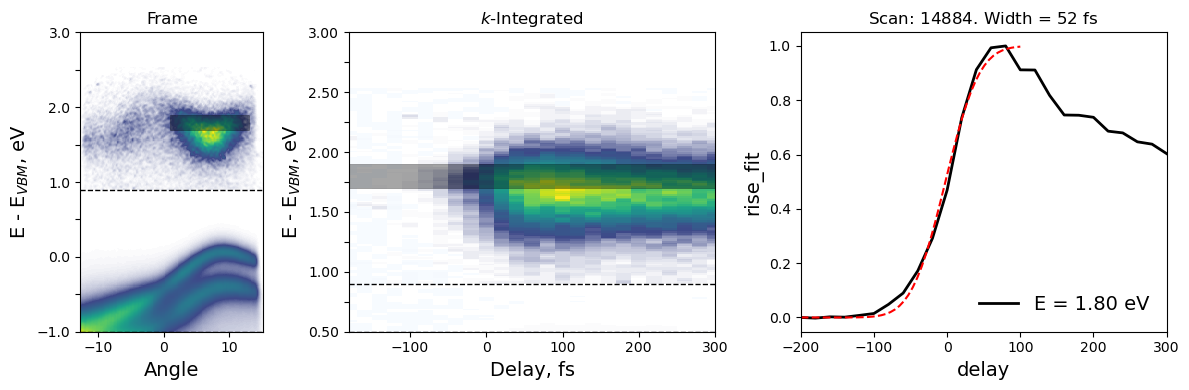

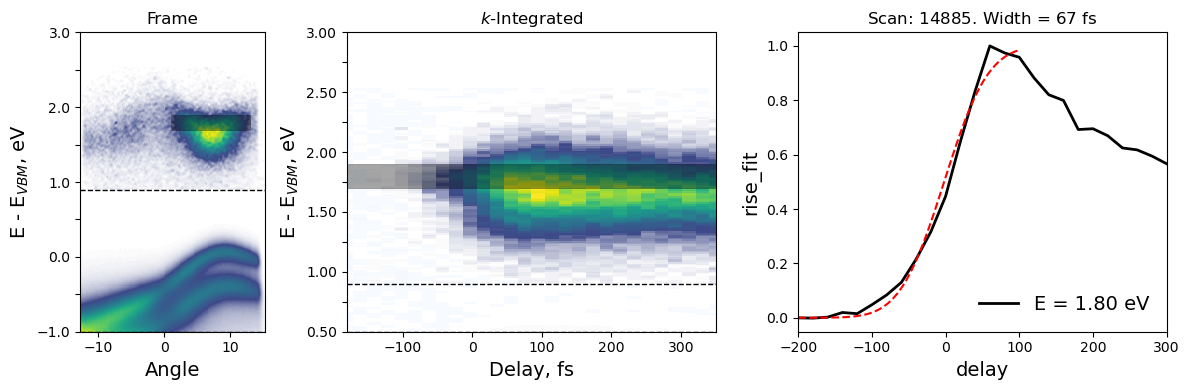

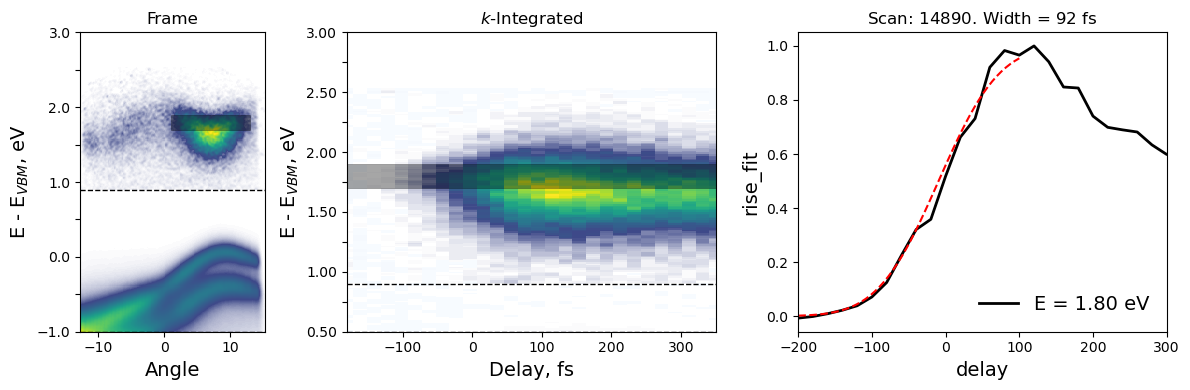

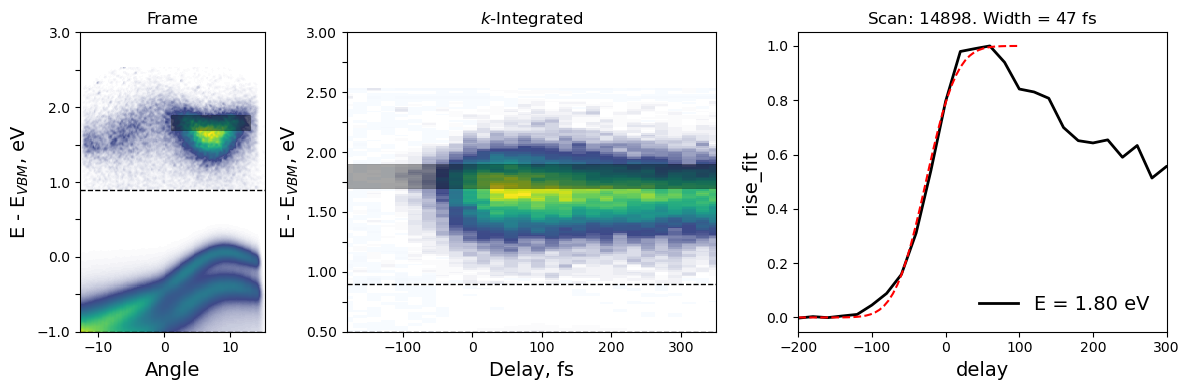

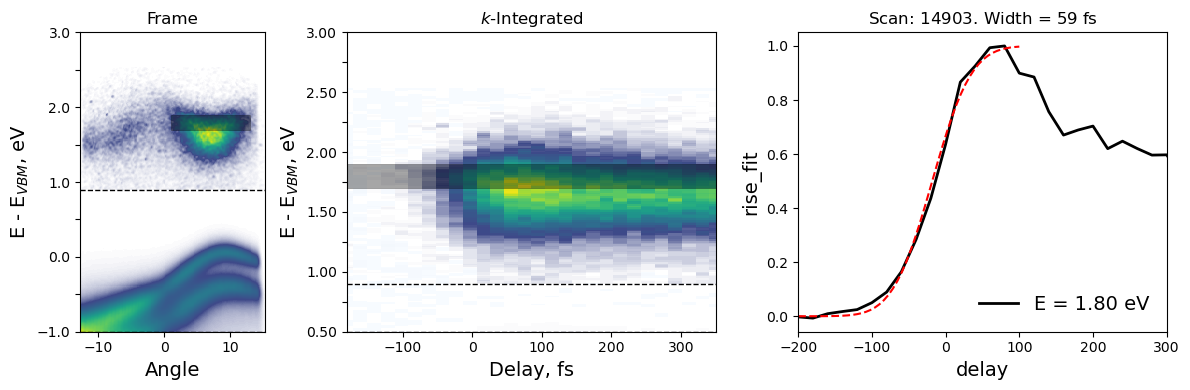

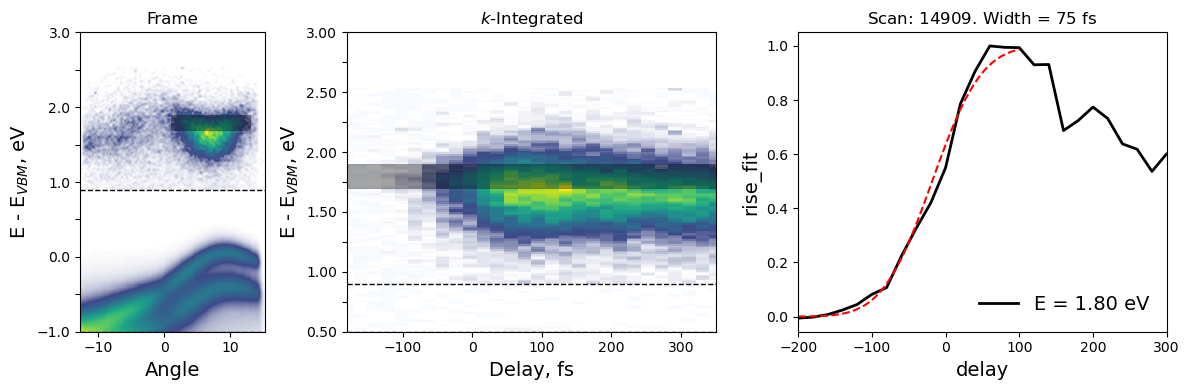

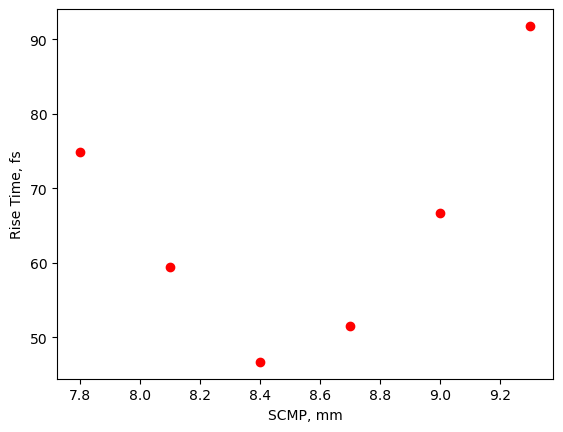

In [277]:
%matplotlib inline

scans = [14884, 14885, 14890, 14898, 14903, 14909]
scmp = [8.7, 9.0, 9.3, 8.4, 8.1, 7.8]
widths = []

for scan in scans:

    I = phoibos.load_data(data_path, scan, force_offset=False, scan_info = None, energy_offset=20.5, delay_offset=0)
    I_res = I/np.max(I)

    fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 2, 2], 'height_ratios':[1]})
    fig.set_size_inches(12, 4, forward=False)
    ax = ax.flatten()

    im0 = mpes.plot_phoibos_frame(I_res, fig=fig, ax=ax[0], energy_limits=(-1,3), E_enhance = 0.9, subtract_neg = False)
    waterfall = mpes.plot_waterfall(I_res, 0, 30, fig = fig, ax=ax[1], energy_limits = (0.5, 3), E_enhance = .9, subtract_neg=True)

    E, E_int = [1.8], 0.2
    a, a_int = 7, 12
    colors = ['black', 'maroon', 'grey']
    traces = mpes.get_time_trace(I_res, E[0], E_int, a, a_int)
    mpes.plot_time_traces(I_res, E, E_int, a, a_int, fig=fig, ax=ax[2], colors = colors)

    delay_limits = [-200, 100]
    popt, perr, rise_fit = mpes.find_t0(traces/np.max(traces), delay_limits)

    rise_fit.plot(ax=ax[2], color = 'red', linestyle = 'dashed')

    for i in np.arange(len(E)):
        mpes.add_rect(a, a_int, E[i], E_int, ax[0], edgecolor=colors[i], facecolor=colors[i], alpha = 0.35)
        mpes.add_rect(500, 50000, E[i], E_int, ax[1], edgecolor=colors[i], facecolor=colors[i], alpha = 0.35)

    ax[2].set_xlim(-200, 300)

    ax[2].set_title(fr"Scan: {scan}. Width = ${popt[1]:.0f}$ fs")
    widths.append(popt[1])

    fig.tight_layout()

plt.figure()
plt.plot(scmp, widths, 'ro')
plt.xlabel('SCMP, mm')
plt.ylabel('Rise Time, fs')

t0 = 14.8 +/- 1.2 fs
width = 56.9 +/- 2.3 fs


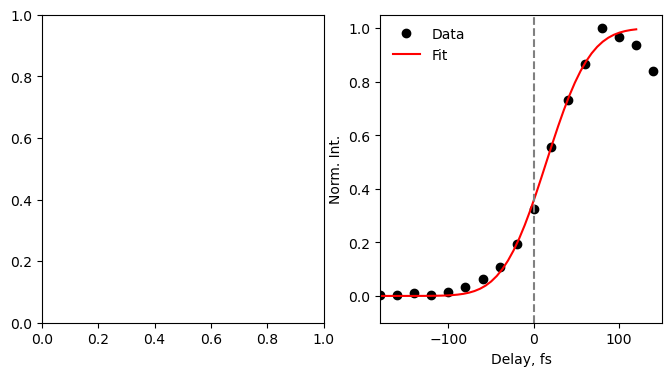

In [200]:
#%% Define t0 from Exciton Rise

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios':[1]})
fig.set_size_inches(8, 4, forward=False)
ax = ax.flatten()

figure_file_name = 'define_t0'
save_figure = False

### Plot EDCs at GAMMA vs time

(kx, ky), (kx_int, ky_int) = (0, 0), (7, 4)
#(kx, ky), (kx_int, ky_int) = (0, .7), (1.5, 0.5)
delay_limits = [-200, 120]

popt, perr, rise_fit = mpes.find_t0(traces/np.max(traces), delay_limits, fig=fig, ax=ax)

if save_figure is True:
    mpes.save_figure(fig, name = f'test', image_format = 'pdf')